In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_data():
    train_data = datasets.STL10(root='./dataset/stl10/', split='train', download=True)
    test_data = datasets.STL10(root='./dataset/stl10/', split='test', download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading STL10 train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading STL10 test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Files already downloaded and verified
Files already downloaded and verified


Loading STL10 test data: 100%|████████████████████████████████| 8000/8000 [00:01<00:00, 4541.29it/s]


Number of training samples: 5000 
Number of test samples: 8000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [500 500 500 500 500 500 500 500 500 500]
Test Class Distribution: [800 800 800 800 800 800 800 800 800 800]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=13824
entrySize=27648
input_addr_length=2


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [08:01<00:00, 16.60it/s]


Accuracy:   0.10
Total Training Execution Time: 215.77 seconds


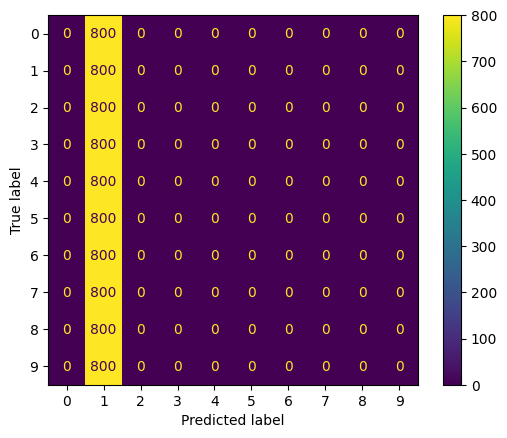

num_of_htables=6912
entrySize=27648
input_addr_length=4


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [05:39<00:00, 23.58it/s]


Accuracy:   0.10
Total Training Execution Time: 128.99 seconds


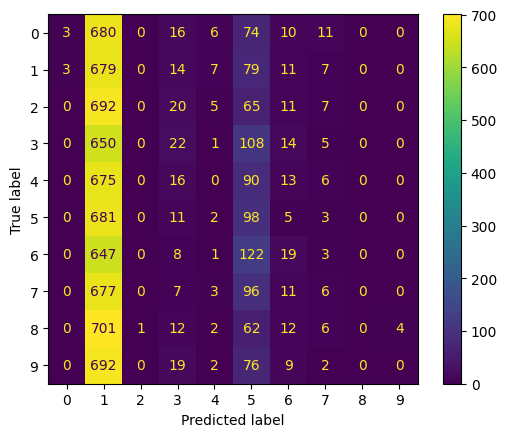

num_of_htables=3456
entrySize=27648
input_addr_length=8


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [04:01<00:00, 33.12it/s]


Accuracy:   0.37
Total Training Execution Time: 96.04 seconds


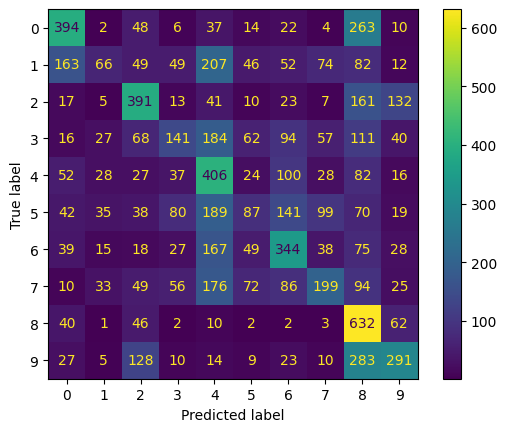

num_of_htables=1728
entrySize=27648
input_addr_length=16


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [03:04<00:00, 43.35it/s]


Accuracy:   0.13
Total Training Execution Time: 89.23 seconds


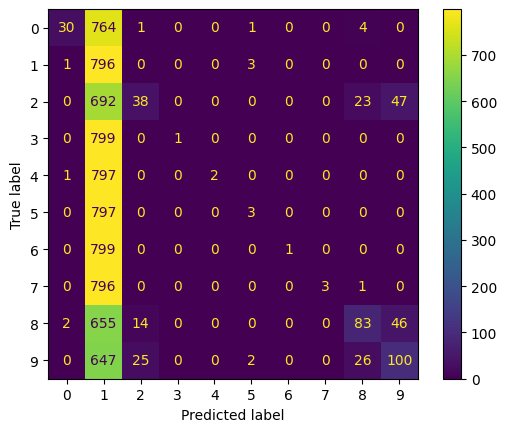

num_of_htables=1152
entrySize=27648
input_addr_length=24


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [02:39<00:00, 50.11it/s]


Accuracy:   0.10
Total Training Execution Time: 83.81 seconds


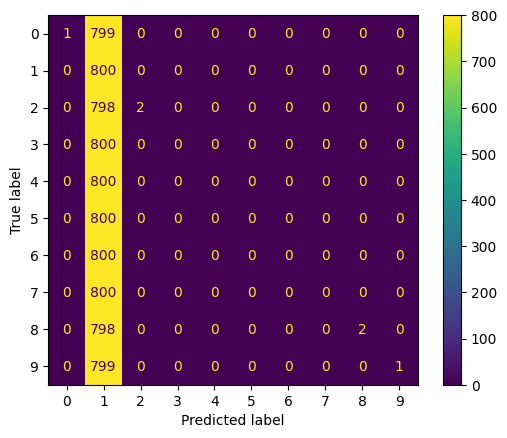

num_of_htables=864
entrySize=27648
input_addr_length=32


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [02:28<00:00, 53.78it/s]


Accuracy:   0.10
Total Training Execution Time: 80.22 seconds


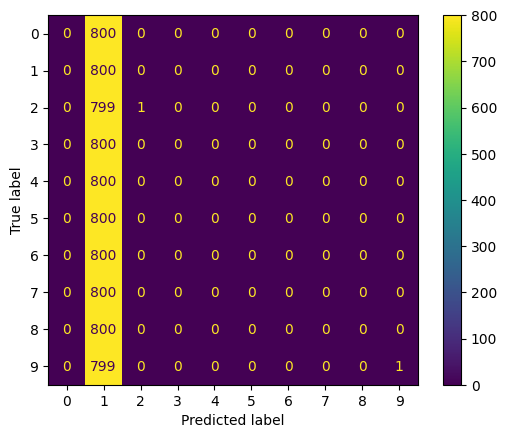

num_of_htables=691
entrySize=27648
input_addr_length=40


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [02:21<00:00, 56.48it/s]


Accuracy:   0.10
Total Training Execution Time: 78.33 seconds


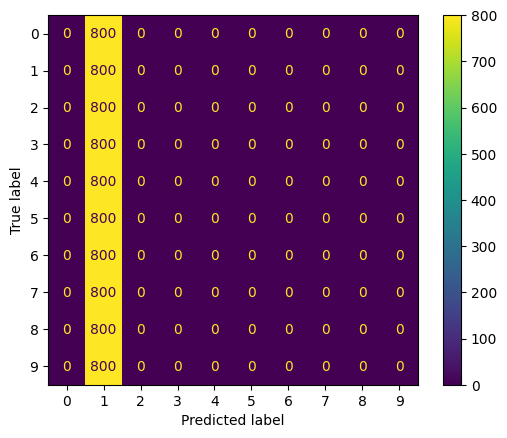

num_of_htables=576
entrySize=27648
input_addr_length=48


 Testing: 100%|█████████████████████████████████████████████████| 8000/8000 [02:16<00:00, 58.61it/s]


Accuracy:   0.10
Total Training Execution Time: 77.54 seconds


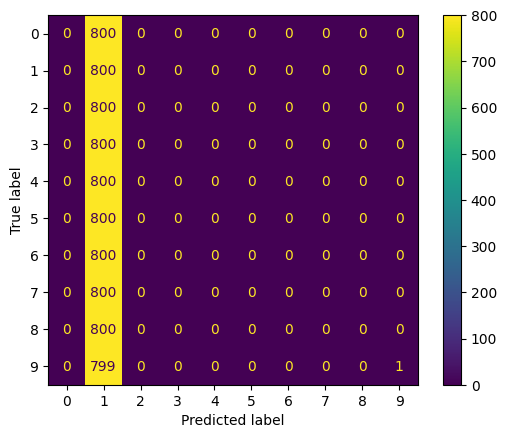

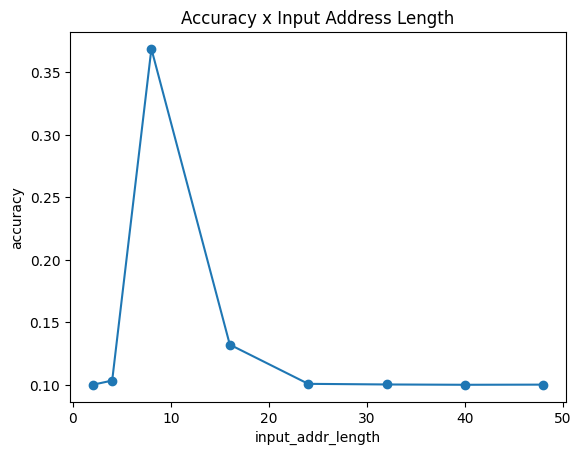

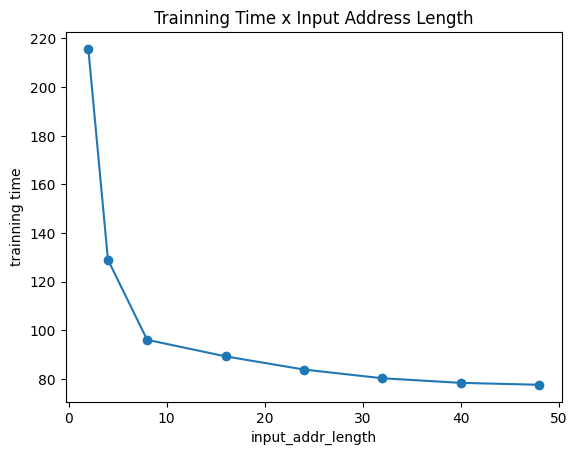

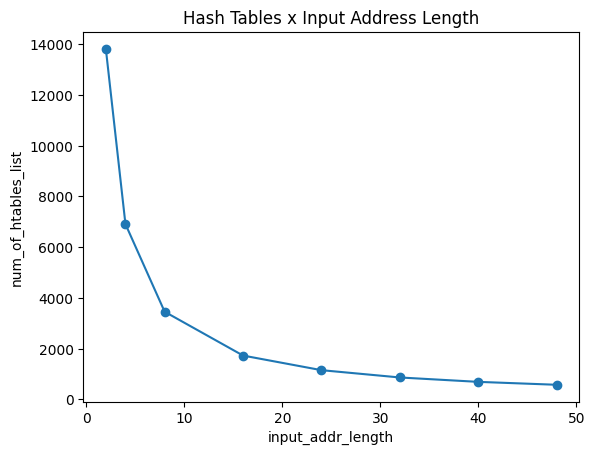

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2           13824  0.100000      215.766523
                 4            6912  0.103375      128.985056
                 8            3456  0.368875       96.042966
                16            1728  0.132125       89.229231
                24            1152  0.100750       83.806484
                32             864  0.100250       80.220832
                40             691  0.100000       78.328695
                48             576  0.100125       77.538275


In [6]:

# Definir a lista de valores de addr
#addr_list = list(range(2, 49, 2))
addr_list = [2,4,8,16,24,32,40,48]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))